## Exploratory data analysis and application of clustering techniques on th UsArrests.csv data.

## Exploring data

In [56]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in csv file as a dataframe and display head
df = pd.read_csv("UsArrests.csv",index_col='City')

# Correct index title from 'City' to 'State' 
df = df.rename_axis('State')
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


The data diplsays statistics for the number of arrests per 100,000 residents for murder, assualt and rape aswell as the percentage of the population living in urban areas, for each of the 50 US states in 1973.

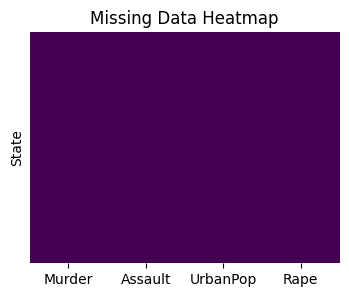

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [57]:
# Look for missing data

missing_data = df.isnull()

plt.figure(figsize=(4, 3))  # Set the figure size
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Data Heatmap')
plt.show()
print(missing_data.sum())

None of the data is missing. The statistical properties of the columns are summarised below:

In [58]:
# To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Use describe function give us insight into the statistical properties of the columns
stats = df.describe() 
selected_stats = stats.loc[["mean","std","min","max"]].transpose() # select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


We can see that the mean number for the Assault variable is was much greater than the mean number for Rape and Murder. This suggests that assualt is the most common crime people are arrested for and muder is the least common. This is likely due the event of an assualt being more common than rape or murder (if we assume that an equal representation of arrests take place for each crime)

In [59]:
# Find out the type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


The visualisation of the distribution of the observations for each feature is shown as histograms below:

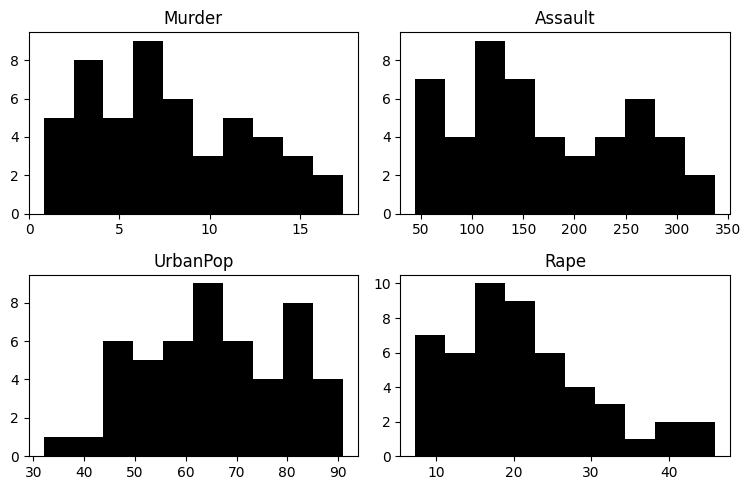

In [60]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(7.5, 5)) 
plt.tight_layout()
plt.show()

The UrbanPop feature is a percentage whereas the other three variables are arrests per 100,000 residents. Therefore, the data should be scaled so that one or more variables do not disproportionatly impact the analysis.

## Correlation Analysis

The correlations between each variable is shown below

<Axes: >

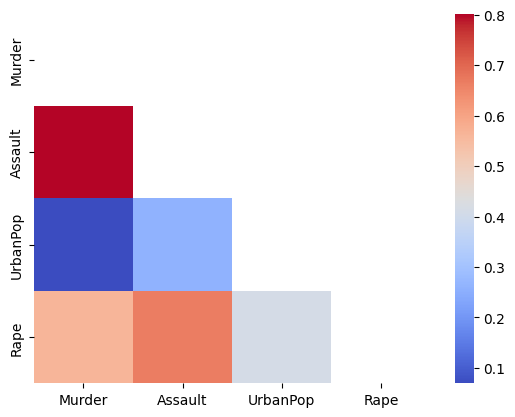

In [61]:
# Create a correlation map
states = df.index
correlations = df.corr()
labels = correlations.columns
# Remove the mirroed correlation map to omit the repeated correlations
mask_ut=np.triu(np.ones(correlations.shape)).astype(bool)

sns.heatmap(correlations, mask=mask_ut, fmt=".2f", cmap="coolwarm")

In the above plot, dark red indicates strongly correlated features and dark blue indicates weakly correlated features. There appears to be no negative correlations between features.

Murder is strongly correlated with assualt, which makes sense, as very often when a murder occurs, an assualt occurs alongside it. We also see that muder is somewhat correlated with rape, and assault is quite strongly correlated with rape. Each the these types of crimes are correlated to varying degrees given that they are are all violent forms of crime, which suggests that if one type of violent crime is higher in one state than another, the other types of violent crime are also likely to be higher (to differing degrees).

The correlation between UrbanPop (the percentage of residents living in urban areas) and each form of crime is weak. The strongest of these correlations is with rape.
The reason for these slight correlations is possibly due to higher population densities in urban areas, resulting in more oppurtunity for violent crime to occur. It is also worth mentioning that urban areas generally have higher socioeconomic disparities, overcrowded living condidtions and increased competition for resources as well as many other factors which could account for this overall positive correlation.

## PCA

The data is scaled before principal component analysis is performed on it.

In [62]:
# Scale the data before performing PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
x = pd.DataFrame(x, columns=df.columns)
x.head()

,Murder,Assault,UrbanPop,Rape
0,1.26,0.79,-0.53,-0.00
1,0.51,1.12,-1.22,2.51
2,0.07,1.49,1.01,1.05
3,0.23,0.23,-1.08,-0.19
4,0.28,1.28,1.78,2.09


In [63]:
# Import PCA from sklearn and 

from sklearn.decomposition import PCA # run again if it does not converge the first time

np.set_printoptions(precision=2) # set precision of values in arrays to 2

X = x.values.squeeze() # get rid of any unnecesary empty columns

# Initialise PCA variable
pca = PCA()

# Fit data to pca variable 
X_trans = pca.fit_transform(X) # stores values transformed data in new principle component dimensional space

# Store data as a dataframe variable
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,0.99,1.13,-0.44,0.16
1,1.95,1.07,2.04,-0.44
2,1.76,-0.75,0.05,-0.83
3,-0.14,1.12,0.11,-0.18
4,2.52,-1.54,0.60,-0.34


The standard deviations, proportions of variance explained, and the cumulative proportions of variance for eachb principle component are calculated and displayed below.

In [64]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Standard deviation: [1.59 1.   0.6  0.42]
Proportion of Variance Explained: [0.62 0.25 0.09 0.04]
Cumulative Proportion: [2.53 3.54 3.9  4.08]


We can see that most of the variance is explained by the first two principle components.

A biplot is graphed whch displays vectors that represent the importance of each variable with respect to the first two principle components, as well as a scatter plot of the projected observations, transformed from the original data. 

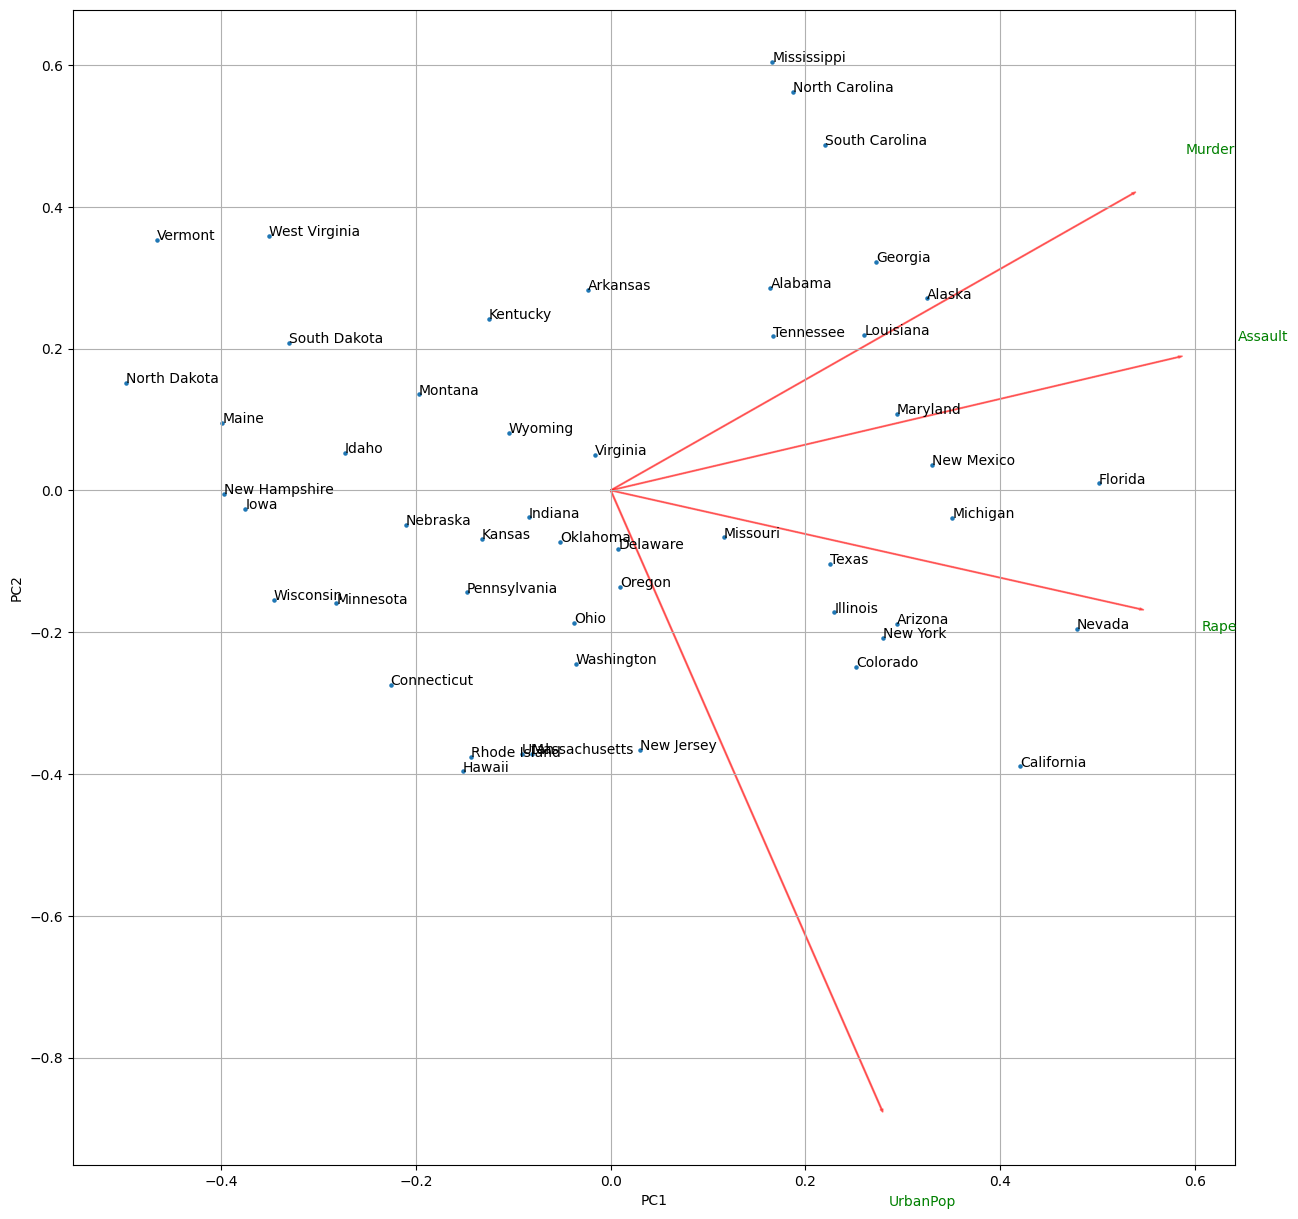

In [65]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize = (15,15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

The biplot above displays points which are projected observations, labelled by the name of the state, for the first two principle components. The red arrows represent the importance of each variable with respect to each principle component.

In [66]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

# Store PCs in a dataframe and display
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


We can see that the feature with the highest importance for the first principle component is Assault at 0.583. However, Rape and Murder are closely behind. The highest importance feature in the second principle component is by far UrbanPop. 

Text(0.5, 1.0, 'Cumulative Explained Variance')

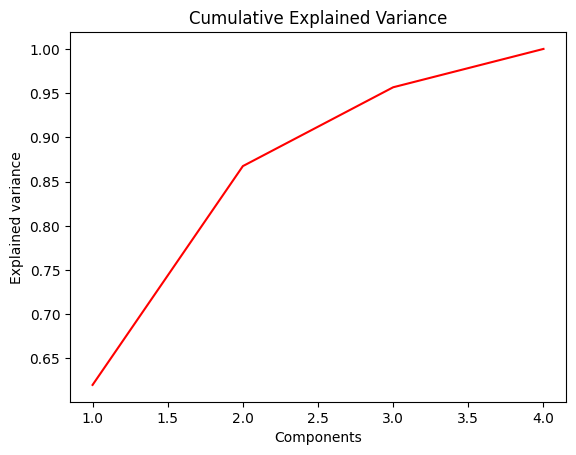

In [67]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

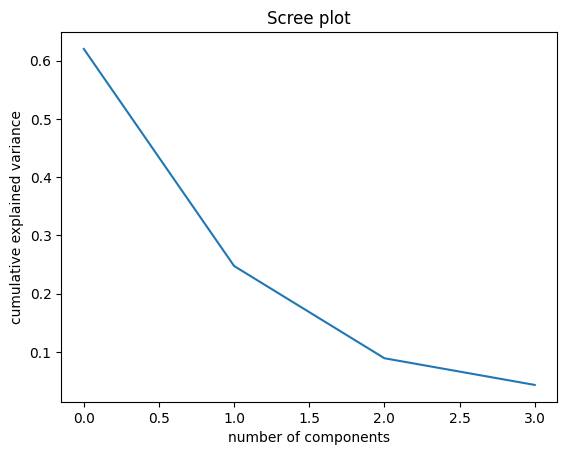

In [68]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first two components explain around 85% of the variance so I will be using them to perform cluster analysis. The data has been successfully dimensionally reduced. The data has reduced from 4 to 2 components.

First The data PC data will be put into a dataframe. 

In [69]:
pca_df = pd.DataFrame(X_trans[:,0:2], index = df.index)
pca_df.head()

,0,1
State,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543


## Heirarchical Clustering

Now Heirarchical clustgering will be performed on the data with single, average and complete linkage methods.

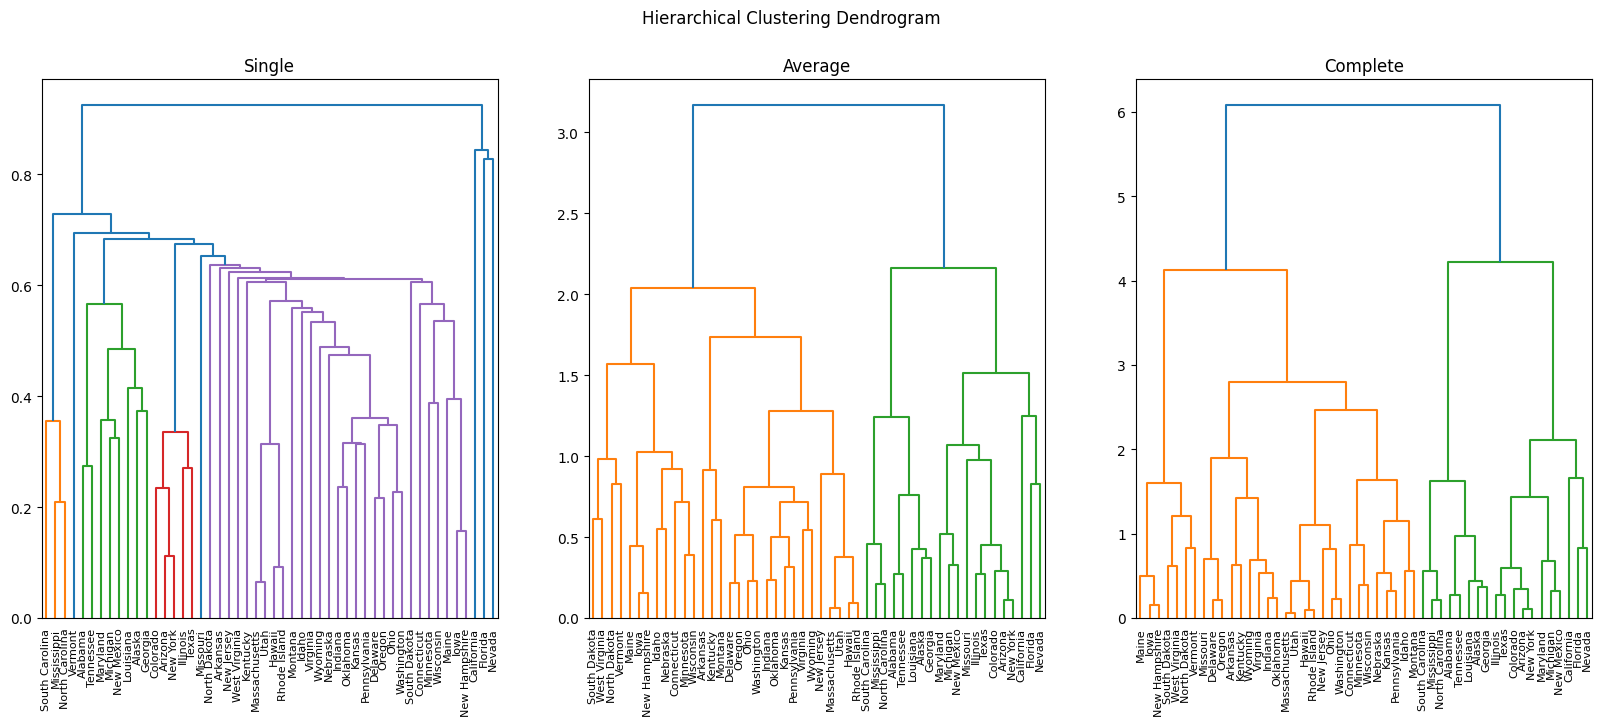

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,7))
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

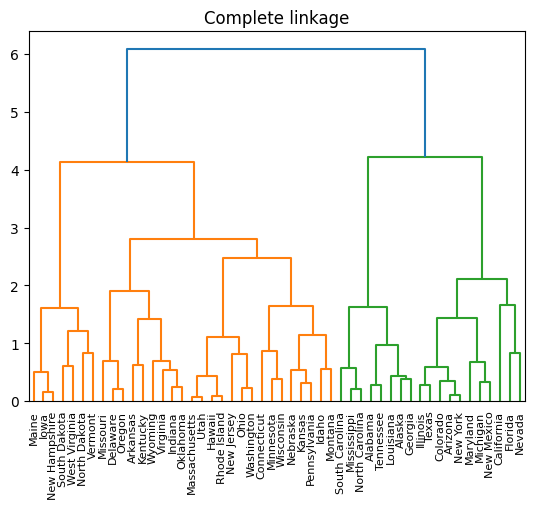

In [71]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

Based on the dendrogram with complete linkage, the states seem to be grouped into two main clusters so we can set k to 2. It seems that we can also consider k = 4 if we draw our horizontal line lower down. 

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscor

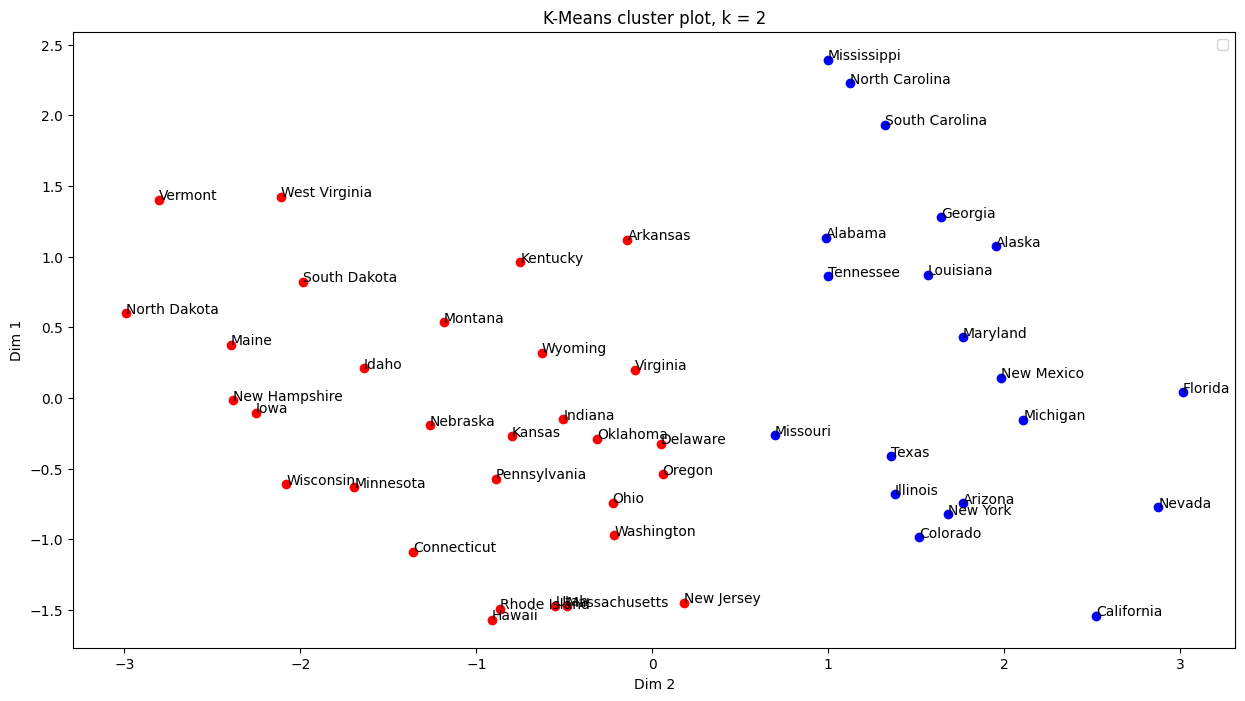

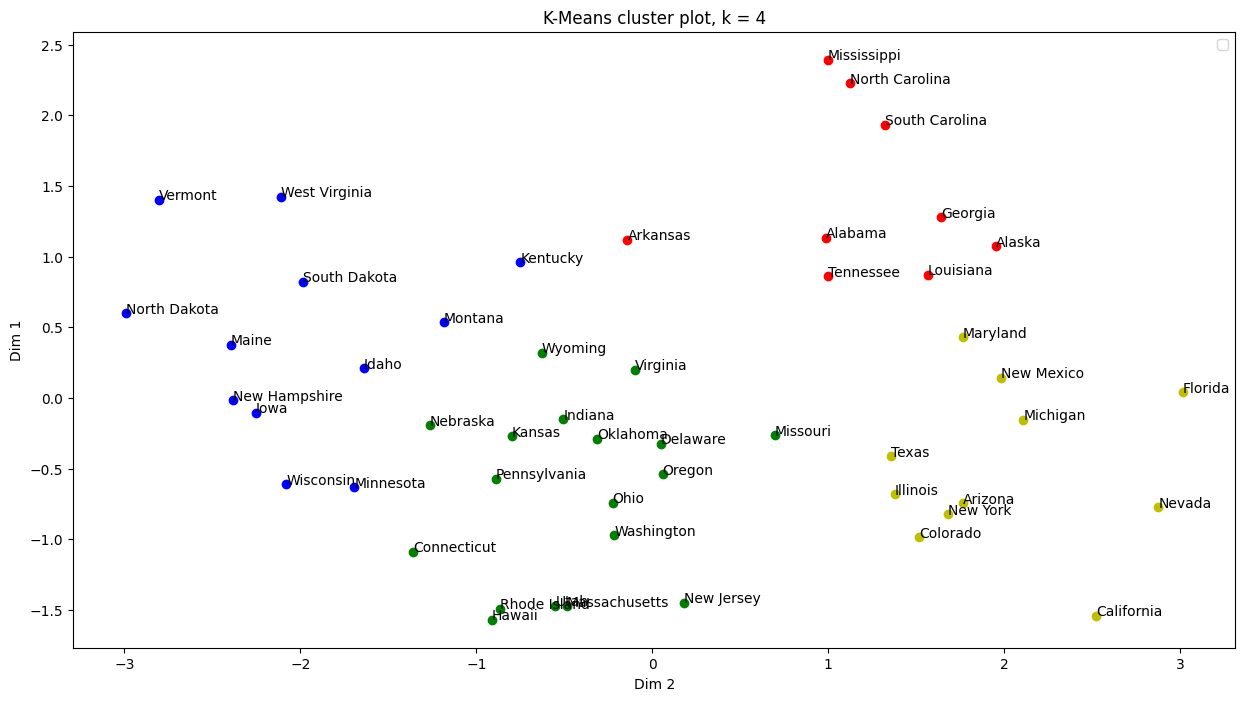

In [76]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_trans[:,0]
y = X_trans[:,1]

# Fit k-means
k=[2,4]
for cluster in k:
 kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
 cluster_labels = kmeans.fit_predict(pca_df)
 cent = kmeans.cluster_centers_

 # Plot clusters
 fig, ax = plt.subplots(figsize=(15,8))
 colours = 'rbgy'

 for i in range(0,cluster):
        ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

 for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
 ax.set_title(f"K-Means cluster plot, k = {cluster}")
 ax.set_xlabel("Dim 2")
 ax.set_ylabel("Dim 1")
 ax.legend()

Looking at the k = 2 plot, the states appear to be clustered such that states with a relatively high urban population are clustered together and those with relatively low urban population are clustered together.

Looking at the k = 4 plot, the states now appear to be clustered based on urban population but also the relative amount of violent crimes that occur